In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_excel("sample-superstore-subset-excel.xlsx")


# Display the first few rows and summary statistics
print(df.head())
print(df.info)
print(df.describe())


   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

    Region State or Province       City  Postal Code Order Date  Ship Date  \
0  Centr

In [3]:

# Handle missing values
df.isnull().sum()
product_base_margin_median=df['Product Base Margin'].median()
df['Product Base Margin']=df['Product Base Margin'].replace(np.nan,product_base_margin_median)

# Convert data types if necessary
df.dtypes
# Create any new columns needed for analysis
df['sales_values']= np.where(df['Sales'] > 500, 'High', 'Low')


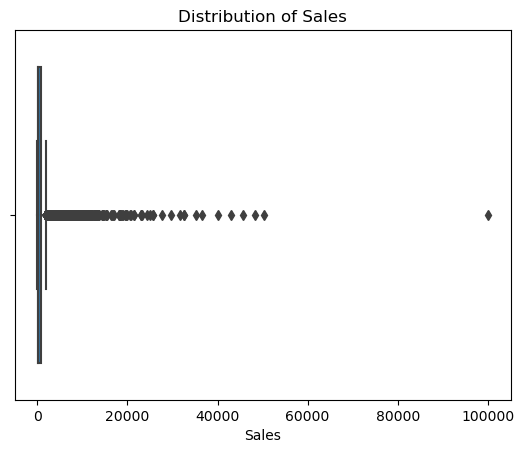

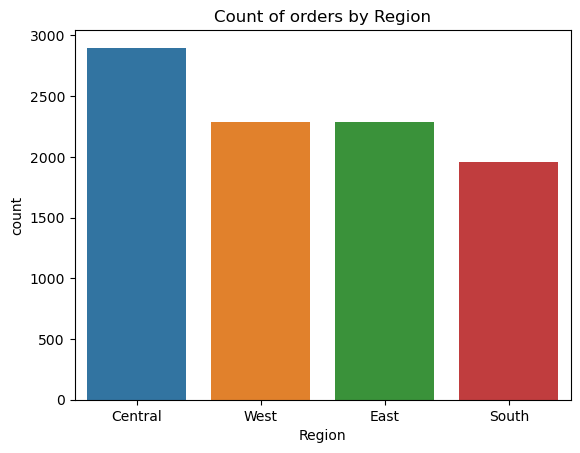

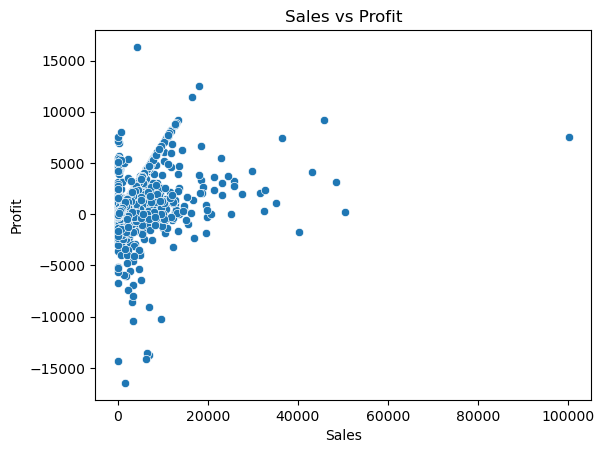

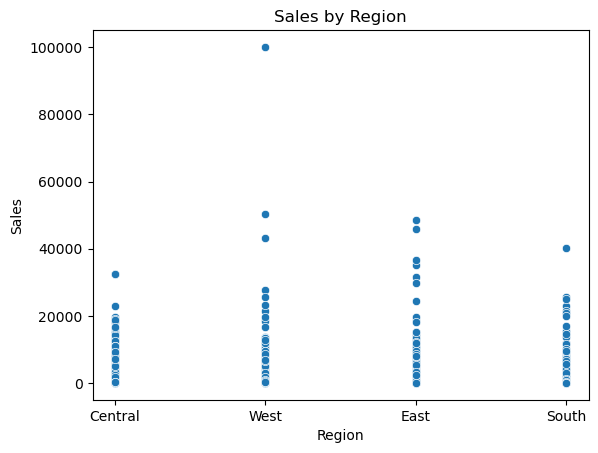

In [4]:

# Univariate analysis
sns.boxplot(x='Sales',data =df)
plt.title('Distribution of Sales')
plt.show()

sns.countplot(x='Region',data = df)
plt.title("Count of orders by Region")
plt.show()



# Bivariate analysis
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Sales vs Profit")
plt.show()

sns.scatterplot(x='Region', y='Sales', data=df)
plt.title("Sales by Region")
plt.show()









In [5]:

# Summary statistics for key variables
x=['Sales','Profit','Quantity ordered new','Discount']
z=df[x].describe()
print(z)

# Grouped statistics
print(df.groupby('Region')['Sales'].sum())
print(df.groupby('Product Category')['Sales'].sum())





               Sales        Profit  Quantity ordered new     Discount
count    9426.000000   9426.000000           9426.000000  9426.000000
mean      949.706272    139.236410             13.798430     0.049628
std      2598.019818    998.486483             15.107688     0.031798
min         1.320000 -16476.838000              1.000000     0.000000
25%        61.282500    -74.017375              5.000000     0.020000
50%       203.455000      2.567600             10.000000     0.050000
75%       776.402500    140.243850             17.000000     0.080000
max    100119.160000  16332.414000            170.000000     0.250000
Region
Central    2540341.62
East       2422804.68
South      1597346.22
West       2391438.80
Name: Sales, dtype: float64
Product Category
Furniture          3178623.74
Office Supplies    2258325.55
Technology         3514982.03
Name: Sales, dtype: float64



### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [6]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions
region1 = df[df['Region'] == 'East']['Sales']
region2 = df[df['Region'] == 'Central']['Sales']

t_stat, p_value = ttest_ind(region1, region2)
print(f"T-statistic: {t_stat}",f"P-value: {p_value}")





# Example: Chi-square test for independence between Ship Mode and Customer Segment
crosstab = pd.crosstab(df['Ship Mode'], df['Customer Segment'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}",f"p-value: {p}",f"Dof: {dof}")




T-statistic: 2.7066878861206596 P-value: 0.0068180648680200955
Chi-square statistic: 1.6522944786735398 p-value: 0.9487444717191827 Dof: 6


In [7]:
# Selecting only numeric columns for correlation matrix
print("Corelation Matrix")
df.corr(numeric_only=True)







Corelation Matrix


,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
Row ID,1.000000,0.000912,0.007586,0.004780,0.038840,-0.002041,0.033833,-0.006431,-0.574926,-0.220454,0.918587
Discount,0.000912,1.000000,0.001099,-0.002141,-0.005723,0.006910,-0.001707,-0.039467,-0.014062,-0.021286,-0.000055
Unit Price,0.007586,0.001099,1.000000,0.246251,-0.007310,0.061985,0.023104,-0.048559,-0.054415,0.433984,0.009805
Shipping Cost,0.004780,-0.002141,0.246251,1.000000,-0.014462,0.375115,-0.003406,-0.017034,-0.020198,0.310223,0.007070
Customer ID,0.038840,-0.005723,-0.007310,-0.014462,1.000000,-0.020385,-0.086988,0.007962,-0.028248,-0.004937,0.043739
Product Base Margin,-0.002041,0.006910,0.061985,0.375115,-0.020385,1.000000,-0.004403,-0.069927,0.000234,0.117595,0.006753
Postal Code,0.033833,-0.001707,0.023104,-0.003406,-0.086988,-0.004403,1.000000,0.005364,-0.010895,-0.000176,0.037847
Profit,-0.006431,-0.039467,-0.048559,-0.017034,0.007962,-0.069927,0.005364,1.000000,0.124924,0.371583,-0.003428
Quantity ordered new,-0.574926,-0.014062,-0.054415,-0.020198,-0.028248,0.000234,-0.010895,0.124924,1.000000,0.360121,-0.599471
Sales,-0.220454,-0.021286,0.433984,0.310223,-0.004937,0.117595,-0.000176,0.371583,0.360121,1.000000,-0.228260


In [8]:

# Plotting sales trends over time


# Resample sales data by month







In [9]:

# Plotting profit trends over time







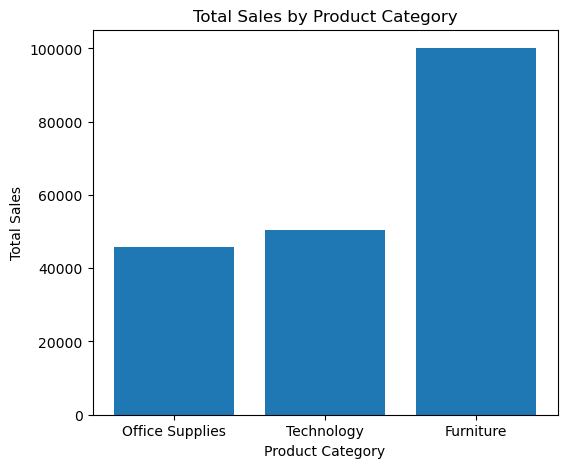

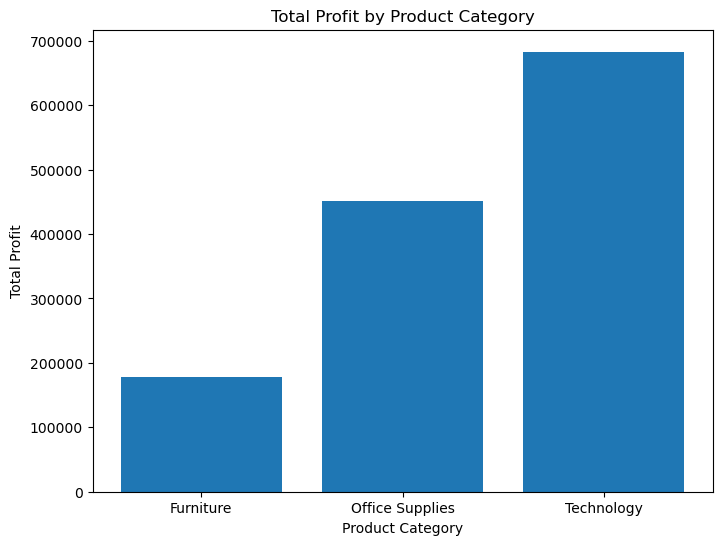

,Sales,Profit
Product Category,,
Furniture,3178623.74,177354.298188
Office Supplies,2258325.55,451990.216492
Technology,3514982.03,683097.884748


In [10]:

# Identifying top-performing product categories based on total sales and profit
x = df.groupby('Product Category').agg({'Sales': 'sum', 'Profit': 'sum'})
top_sales = x.sort_values(by='Sales').head(1)
top_profit = x.sort_values(by='Profit').head(1)



# Plotting total sales by product category
plt.figure(figsize=(6,5))
plt.bar(df['Product Category'], df['Sales'])
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.show()






# Plotting total profit by product category
data = df.groupby('Product Category')['Profit'].sum()
plt.figure(figsize=(8, 6))
plt.bar(data.index,data.values)
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Product Category')
plt.show()
x









In [11]:

# Generating summary statistics for each region
data = df.groupby('Region')



# Display summary statistics
x=data.describe()
x



Row ID                                                            \
          count          mean    min       25%      50%      75%      max   
Region                                                                      
Central  2899.0  21009.057261   52.0  19692.50  21825.0  24161.5  26387.0   
East     2289.0  19120.730887    2.0  18709.00  21421.0  23779.0  26389.0   
South    1954.0  21172.882805  257.0  19770.75  21986.5  24323.0  26399.0   
West     2284.0  19591.675569   64.0  18973.00  21346.0  23897.5  26397.0   

                     Discount            ...      Sales              Order ID  \
                 std    count      mean  ...        max          std    count   
Region                                   ...                                    
Central  5031.383479   2899.0  0.049348  ...   32589.59  2041.342685   2899.0   
East     7195.690558   2289.0  0.050000  ...   48418.58  2802.669839   2289.0   
South    4947.572889   1954.0  0.049401  ...   40136.93  2173.877698   1954.0   
West     6750.747199   2284.0  0.049803  ...  100119.16  3258.451329   2284.0   

                                                                     \
                 mean     min       25%      50%       75%      max   
Region                                                                
Central  84911.884443   322.0  86841.50  88502.0  90118.50  91582.0   
East     78601.416776     6.0  86301.00  87993.0  89752.00  91591.0   
South    85157.528659  1793.0  87027.25  88528.5  89994.50  91589.0   
West     80323.148424   359.0  86762.50  88262.0  89923.25  91588.0   

                       
                  std  
Region                 
Central  15071.723809  
East     23259.222646  
South    14856.277937  
West     21476.998213  

[4 rows x 104 columns]

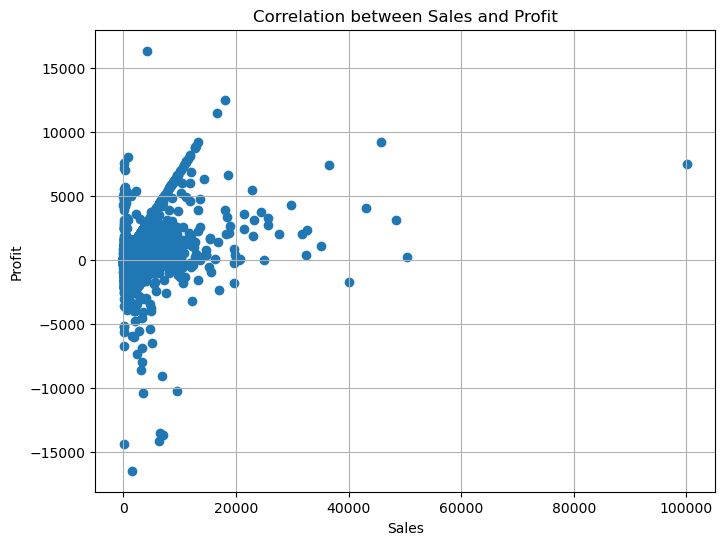

Correlation Coefficient between Sales and Profit: 0.3715830697718408


In [12]:

# Visualizing the correlation between sales and profit
correlation_coefficient = df['Sales'].corr(df['Profit'])
plt.figure(figsize=(8, 6))
plt.scatter(df['Sales'], df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title("Correlation between Sales and Profit")
plt.grid(True)
plt.show()






# Displaying the correlation coefficient
print(f"Correlation Coefficient between Sales and Profit: {correlation_coefficient:}")





In [13]:

# Analyzing seasonal sales trends




# Grouping sales data by month and year



# Plotting seasonal sales trends








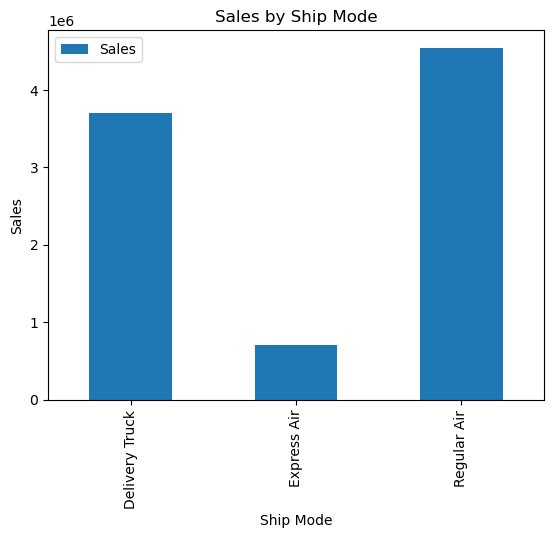

,Sales
Ship Mode,
Delivery Truck,3706516.02
Express Air,701756.34
Regular Air,4543658.96


In [14]:

# Comparing sales across different ship modes
sales_by_ship_mode = df.groupby('Ship Mode').agg({'Sales':'sum'})
sales_by_ship_mode.plot(kind='bar')
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()



sales_by_ship_mode


In [15]:
# Ensure column names are clean


# Print column names to verify


# Ensure 'Ship Date' column is datetime type


# Dropping rows where 'Ship Date' couldn't be converted


# Resample sales data by month









